## Analysis and Modelling of King County, WA Home Sale Prices


Authors: Erin Vu and Brian Matsiko

### Overview

This project analyzes the factors that determine housing prices in King County, WA, Seattle. The anlalysis then forms the basis of the model is directed towards assisting the Seattle real estate and housing company with the understanding and structuring their business model with the goal of maximising home sales to the community needs.

## Business Problems

Seattle Rental Group seeks to it's increase porfolio in King County Seattle and wants to accurately predict the sales price of a property. Having an accurate sales prediction will aid in strategizing the investment options to maximize their profit. A multiple linaer regression model will be built base on provided property data for this task.

## Aims:

This project aims to:

- Highlight feature that has the greatest correlation with the property sales prices within King County Seattle
- Identify what aspects of the real estate features bring value 
- Understand whether recently revonated and built houses more valueable.
           

## Definitions:

- Model:
      The term model referred to through this project is in reference to the linear regression model which we build to explain the variance in home sale prices
- Features:
      Features refer to the independent variables we choose for our model to help predict sale prices
- Target:
      Sale Price is our target variable which our model aims to predict

## Data:

The data used in this project is from the King County Department of Assessments website and can be found here. From this link, you can find the files/tables that were used in this project:

Our analysis was only looking at data from years 2014 and 2015. 

## Table of contents:

- Data Cleaning and Exploratory Data Analysis (EDA)
- Investigate Target Variable: Sales Price
- First Simple Linear Regression Model
- Model Iterations 1 - 6
- Model interpretation
- Claim Validation
- Conclusion

## Analysis Takeaways, Future Investigations and Recommendations:


## Libraries 

In [1]:
from sklearn.preprocessing import PowerTransformer
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, RFECV
from sklearn import metrics
import pickle
import statsmodels
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

## Data Extraction

In [2]:
kc = pd.read_csv("../data/kc_house_data.csv")
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Exploratory Data Analysis

This section will seek to answer the questions listed in business problems. The data will be visualized for easy understanding and followed with appropriate statistical analysis for empirical findings within data. Following are the summaries of the questions answered in this section: What neighborhood contains most valuable properties? Does condition of the property affect the value? Are the property age and condition related? What features add value to the house? Do renovations increase property value? Do basements increase property value?

## Data Structure

The data set contains mix of continuous and categorical values. They are separated by columns and below is a brief summary of each columns. Further details can be found in King County website.

### Column Description

- id - unique ID for a house
- date - Date day house was sold
- price - Price is prediction target
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms
- sqft_living - square footage of the home
- sqft_lot - square footage of the lot
- floors - Total floors (levels) in house
- waterfront - Whether house has a view to a waterfront
- view - Number of times house has been viewed
- condition - How good the condition is (overall)
- grade - overall grade given to the housing unit, based on King County grading system
- sqft_above - square footage of house (apart from basement)
- sqft_basement - square footage of the basement
- yr_built - Year when house was built
- yr_renovated - Year when house was renovated
- zipcode - zip code in which house is located
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

### Data Integrity and Description

In [17]:
kc.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

For waterfront, view, and yr_renovated, we see that up to 75% of the distribution still remains at a value of 0. As a result, we have decided to fill the NA values in these columns with 0.

In [18]:
#Replace null values and "nan" with 0

kc = kc.replace("nan","0")

col = ['waterfront', 'view', 'yr_renovated']

for val in col:
    kc[val] = kc[val].fillna(value=0)

In [19]:
total_null = 0 
for null_count in kc.isna().sum():
    total_null += null_count
print(f"There are total {total_null} null values in the data")

There are total 0 null values in the data


Checking for duplicate datase

In [20]:
#Check for duplicates
kc_duplicates = kc[kc.duplicated()]
print(len(kc_duplicates))
display(kc_duplicates)

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [21]:
#Check for duplicated IDs 
duplicated_ids = kc.duplicated(subset=['id'], keep=False)
duplicated_ids.value_counts()

False    21244
True       353
dtype: int64

In [22]:
#Explore duplicated IDs
kc_duplicated_ids = kc[duplicated_ids]
kc_duplicated_ids.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,3,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,3,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,0.0,0.0,3,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460


A home's latitude and longitude will not be particularly relevant for prospective homebuyers. Neither will its id,as other data, such as yr_built, will be of much more interest. As a result, we will drop these variables, as they do not make much sense in the context of our business problem.

In [23]:
#Remove features/columns that are of no interest for this analysis 
kc.drop(['id','lat','long'], axis=1, inplace=True)

In [24]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

In [25]:
#Replacing the question mark values with 0 because majority of the values are 0's and also convert it to integers.
kc['sqft_basement'] = kc['sqft_basement'].replace(to_replace = '?', value = 0.0)
kc['sqft_basement'] = kc['sqft_basement'].astype(str).astype(float)

## Preview Distribution of Each Column

Before we conduct any transformations, we need to check the distributions in order to identify categorical variables and see if/which features are normally distributed.

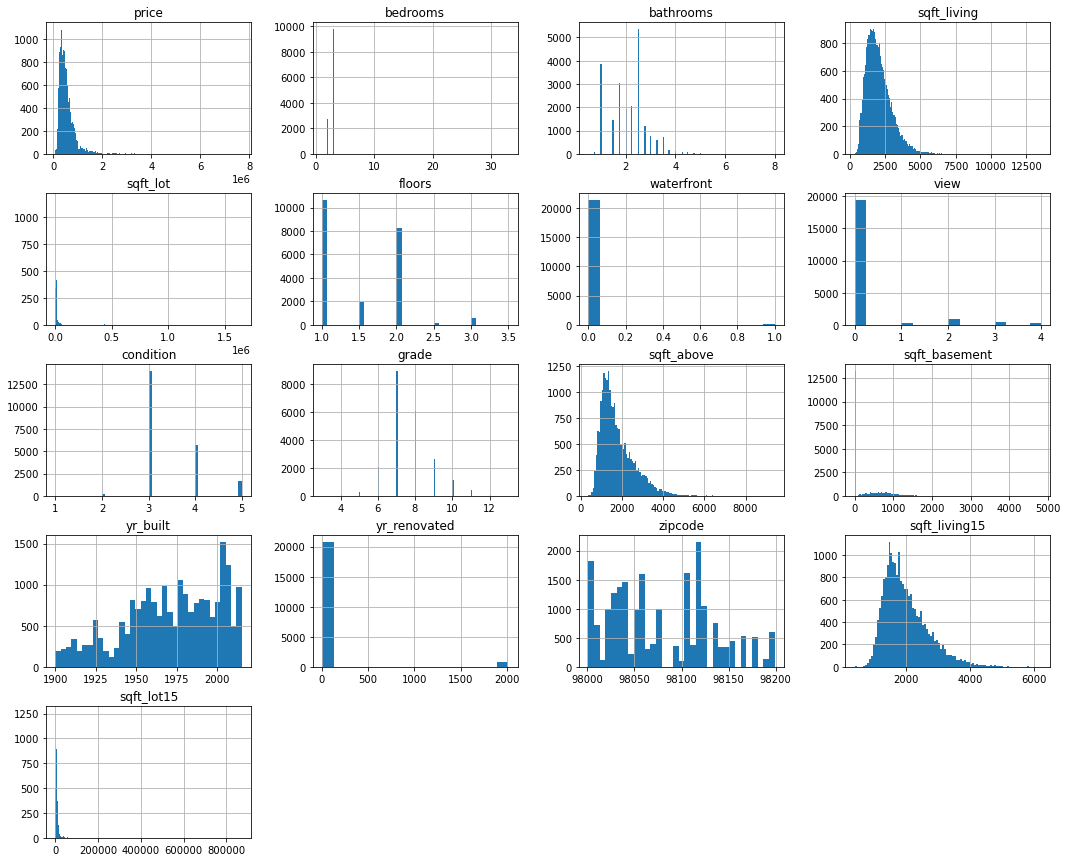

In [11]:
#First, let's plot a histogram for each column
kc.hist(figsize=(18,15), bins='auto');

Bathrooms, bedrooms, condition, floors, grade, view, waterfront, and yr_renovated are categorical. The remaining variables seem to be continuous. Let's explore this further by creating some scatter plots.

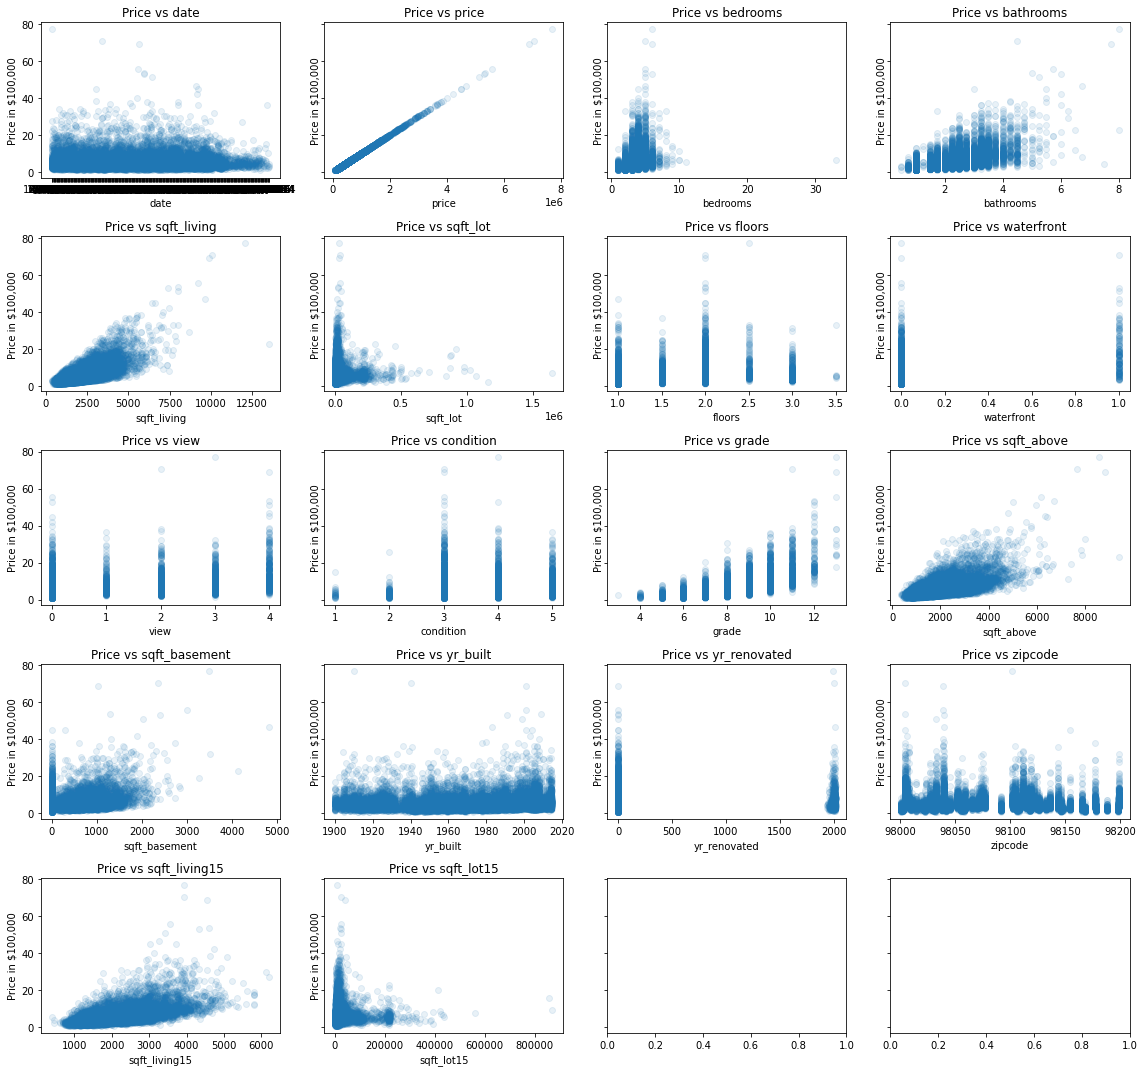

In [12]:
#Next, let's plot scatter plots that will further help us identify outliers and categorical variables 
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), kc.columns):
    ax.scatter(kc[column], kc['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')

fig.tight_layout()

These scatter plots helped confirm which variables are categorical and which are continuous. We have identified our continuous variables, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, sqft_living15 and sqft_lot15, and later we will look to transform some of these variables, since many of them currently do not appear to follow a normal distribution.

### Data Cleaning & Engineering.

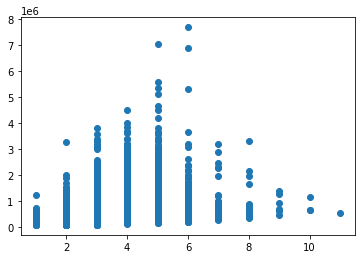

In [26]:
kc.drop(kc[kc['bedrooms'] == 33].index, inplace=True)
plt.scatter(kc['bedrooms'], kc['price'])
plt.show()

In [27]:
kc1 = kc
kc1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,1410,1287


In [28]:
# Creating ['basement'] to replace 'sqft_basement'
kc1['basement'] = kc1['sqft_basement'].apply(lambda x: 0 if x == 0  else 1)
kc1['basement'].value_counts()

0    13280
1     8316
Name: basement, dtype: int64

In [29]:
# Creating 'Age' to replace 'yr_built' 
# 
kc1['Age'] = kc['yr_built'].apply(lambda x: "vintage" if x <= 1999 else "recent" if x >= 2000 and x < 2010 else "new")
kc1['Age'].value_counts()

vintage    16840
recent      3515
new         1241
Name: Age, dtype: int64

In [30]:
# Creating 'renovated' so sa to replace the 'yr_renovated'
kc1['renovated'] = kc['yr_renovated'].apply(lambda x: "not_recent/never" if x <= 1999 else "within_15yrs" if x >= 2000 and x < 2010 else 'within_5yrs')
kc1['renovated'].value_counts()

not_recent/never    21217
within_15yrs          229
within_5yrs           150
Name: renovated, dtype: int64

In [31]:
# To reduce the number of classes of bedrooms and increase variability 
kc1['bedrooms'] = kc['bedrooms'].apply(lambda x: x if x <= 6 else 6)
kc1['bedrooms'].value_counts()

3    9824
4    6882
2    2760
5    1601
6     333
1     196
Name: bedrooms, dtype: int64

In [32]:
def getSeason(date):
    month = int(date.split("/")[0])
    if (month > 11 or month <= 3):
       return "Winter"
    elif (month == 4 or month == 5):
       return "Spring"
    elif (month >=6 and month <= 9):
       return "Summer"
    else:
       return "Fall"

In [33]:
kc1['season'] = kc1.date.map(getSeason)
kc1['season'].value_counts()

Summer    8098
Winter    5570
Spring    4643
Fall      3285
Name: season, dtype: int64

In [34]:
kc1['bathrooms_lg'] =np.log(kc1['bathrooms'])
kc1['sqftlot_lg'] =np.log(kc1['sqft_lot'])
kc1['sqft15_lg'] =np.log(kc1['sqft_living15'])
kc1['sqftabv_lg'] =np.log(kc1['sqft_above'])
kc1['sqftlv_lg'] =np.log(kc1['sqft_living'])
kc1['price_lg'] =np.log(kc1['price'])
kc1['sqftlot_lg'] =np.log(kc1['sqft_lot15'])


In [35]:
kc1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,basement,Age,renovated,season,bathrooms_lg,sqftlot_lg,sqft15_lg,sqftabv_lg,sqftlv_lg,price_lg
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650,0,vintage,not_recent/never,Fall,0.000000,8.639411,7.200425,7.073270,7.073270,12.309982
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,1,vintage,not_recent/never,Winter,0.810930,8.941022,7.432484,7.682482,7.851661,13.195614
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062,0,vintage,not_recent/never,Winter,0.000000,8.994917,7.908387,6.646391,6.646391,12.100712
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,1,vintage,not_recent/never,Winter,1.098612,8.517193,7.215240,6.956545,7.580700,13.311329
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,0,vintage,not_recent/never,Winter,0.693147,8.923058,7.495542,7.426549,7.426549,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,1530,1509,0,recent,not_recent/never,Spring,0.916291,7.319202,7.333023,7.333023,7.333023,12.793859
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,1830,7200,0,new,not_recent/never,Winter,0.916291,8.881836,7.512071,7.745003,7.745003,12.899220
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,1020,2007,0,recent,not_recent/never,Summer,-0.287682,7.604396,6.927558,6.927558,6.927558,12.904459
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,1410,1287,0,recent,not_recent/never,Winter,0.916291,7.160069,7.251345,7.377759,7.377759,12.899220


In [36]:
#Remove features/columns that are of no interest for this analysis 
kc1.drop(['price','sqft_above','sqft_lot15','sqft_lot','bathrooms',
          'sqft_basement','yr_renovated', 'date','yr_built'], axis=1, inplace=True)

In [37]:
#First, let's plot a histogram for each column
kc1.hist(figsize=(18,15), bins='auto');

Error in callback <function flush_figures at 0x00000209E490EDC0> (for post_execute):


KeyboardInterrupt: 

### Correlation Review

Our next logical step would be to investigate correlation amongst variables. First we will look at this more generally, then we will narrow our results to variables that are more highly correlated with our y-variable, price.

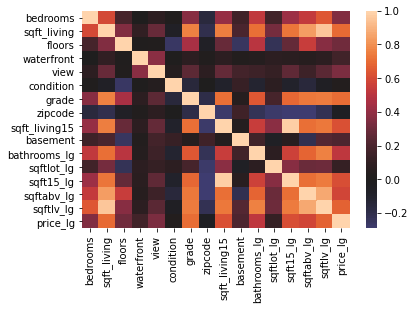

In [39]:
sns.heatmap(kc1.corr(), center=0);

In [40]:
#Look at which features are highly correlated with our y-variable, price.
kc1.corr()[abs(kc1.corr()['price_lg']) > 0.3]

,bedrooms,sqft_living,floors,waterfront,view,condition,grade,zipcode,sqft_living15,basement,bathrooms_lg,sqftlot_lg,sqft15_lg,sqftabv_lg,sqftlv_lg,price_lg
bedrooms,1.000000,0.596216,0.184706,-0.001671,0.081805,0.024072,0.372253,-0.162649,0.411579,0.159994,0.524246,0.171761,0.425612,0.535851,0.643579,0.353272
sqft_living,0.596216,1.000000,0.353941,0.104635,0.281710,-0.059397,0.762776,-0.199793,0.756400,0.201236,0.708155,0.321010,0.732179,0.843135,0.954607,0.695209
floors,0.184706,0.353941,1.000000,0.020794,0.028401,-0.264013,0.458783,-0.059522,0.280072,-0.252426,0.501034,-0.227256,0.275443,0.547599,0.367556,0.310665
view,0.081805,0.281710,0.028401,0.380543,1.000000,0.045663,0.249077,0.085066,0.278921,0.176930,0.157503,0.119111,0.262548,0.157009,0.244800,0.344665
grade,0.372253,0.762776,0.458783,0.082817,0.249077,-0.146854,1.000000,-0.185761,0.713863,0.050736,0.644202,0.184987,0.689050,0.742866,0.743036,0.703747
sqft_living15,0.411579,0.756400,0.280072,0.083822,0.278921,-0.092979,0.713863,-0.279286,1.000000,0.044636,0.550770,0.375957,0.976818,0.714987,0.737217,0.619371
bathrooms_lg,0.524246,0.708155,0.501034,0.047164,0.157503,-0.113338,0.644202,-0.227631,0.550770,0.166217,1.000000,0.079113,0.570470,0.683893,0.760763,0.520292
sqft15_lg,0.425612,0.732179,0.275443,0.076501,0.262548,-0.089150,0.689050,-0.290341,0.976818,0.063442,0.570470,0.373600,1.000000,0.713088,0.746839,0.607205
sqftabv_lg,0.535851,0.843135,0.547599,0.059123,0.157009,-0.150635,0.742866,-0.290326,0.714987,-0.212780,0.683893,0.298676,0.713088,1.000000,0.864986,0.586062
sqftlv_lg,0.643579,0.954607,0.367556,0.078898,0.244800,-0.049584,0.743036,-0.222122,0.737217,0.233579,0.760763,0.303051,0.746839,0.864986,1.000000,0.674820


We should also look at variables to see if they are correlated with each other, in order to investigate potential multicollinearity.

In [41]:
kc_1 = kc.corr().abs().stack().reset_index().sort_values(0, ascending=False)

kc_1['pairs'] = list(zip(kc_1.level_0, kc_1.level_1))

kc_1.set_index(['pairs'], inplace = True)

kc_1.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
kc_1.columns = ['cc']

kc_1.drop_duplicates(inplace=True)

kc_1[(kc_1.cc>.75) & (kc_1.cc<1)]

,cc
pairs,
"(sqft15_lg, sqft_living15)",0.976818
"(sqftlv_lg, sqft_living)",0.954607
"(sqftlv_lg, sqftabv_lg)",0.864986
"(sqftabv_lg, sqft_living)",0.843135
"(sqft_living, grade)",0.762776
"(bathrooms_lg, sqftlv_lg)",0.760763
"(sqft_living15, sqft_living)",0.756400


## Correlarion review Analysis:

The largest multicollinearity lies between sqft_living and sqft_above (0.88). To a lesser extent, there was some multicollinearity between sqft_living and sqft_living15 (between the living space of the house in question and the 15 closest neighbors), as well as sqft_living and grade (0.77) and sqft_above and grade (0.76). With regard to the first relationship, sqft_living has a 0.70 correlation with the target variable, price, while sqft_above only has a 0.60 correlation; this suggests we should drop sqft_above. This may also remove the multicollinearity between sqft_above and grade. Considering the strength of the sqft_living variable, it would also make sense to drop sqft_living15. The grade variable has a strong correlation with price, so despite the collinearity with sqft_living, I'll leav it in for now. Finally, it just doesn't make logical sense to keep the neighbors' lot sizes if we're dropping their living space square footage; accordingly, we'll drop that variable (sqft_lot15), as well as the preceding three.

## First Simple Model

Since sqft_living has the highest correlation with price, then the first simple model will be to show the realtionship between this

In [42]:
kc

,bedrooms,sqft_living,floors,waterfront,view,condition,grade,zipcode,sqft_living15,basement,Age,renovated,season,bathrooms_lg,sqftlot_lg,sqft15_lg,sqftabv_lg,sqftlv_lg,price_lg
0,3,1180,1.0,0.0,0.0,3,7,98178,1340,0,vintage,not_recent/never,Fall,0.000000,8.639411,7.200425,7.073270,7.073270,12.309982
1,3,2570,2.0,0.0,0.0,3,7,98125,1690,1,vintage,not_recent/never,Winter,0.810930,8.941022,7.432484,7.682482,7.851661,13.195614
2,2,770,1.0,0.0,0.0,3,6,98028,2720,0,vintage,not_recent/never,Winter,0.000000,8.994917,7.908387,6.646391,6.646391,12.100712
3,4,1960,1.0,0.0,0.0,5,7,98136,1360,1,vintage,not_recent/never,Winter,1.098612,8.517193,7.215240,6.956545,7.580700,13.311329
4,3,1680,1.0,0.0,0.0,3,8,98074,1800,0,vintage,not_recent/never,Winter,0.693147,8.923058,7.495542,7.426549,7.426549,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,1530,3.0,0.0,0.0,3,8,98103,1530,0,recent,not_recent/never,Spring,0.916291,7.319202,7.333023,7.333023,7.333023,12.793859
21593,4,2310,2.0,0.0,0.0,3,8,98146,1830,0,new,not_recent/never,Winter,0.916291,8.881836,7.512071,7.745003,7.745003,12.899220
21594,2,1020,2.0,0.0,0.0,3,7,98144,1020,0,recent,not_recent/never,Summer,-0.287682,7.604396,6.927558,6.927558,6.927558,12.904459
21595,3,1600,2.0,0.0,0.0,3,8,98027,1410,0,recent,not_recent/never,Winter,0.916291,7.160069,7.251345,7.377759,7.377759,12.899220


In [43]:
FSM_df= kc[['price_lg', 'sqft_living']]
price_target = kc['price_lg']

In [44]:
formula = 'price_lg ~ sqft_living'

In [45]:
fsm = ols(formula, FSM_df).fit()

In [46]:
fsm_summary = fsm.summary()
print(fsm_summary)

                            OLS Regression Results                            
Dep. Variable:               price_lg   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.020e+04
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:19:42   Log-Likelihood:                -9661.4
No. Observations:               21596   AIC:                         1.933e+04
Df Residuals:                   21594   BIC:                         1.934e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2187      0.006   1915.377      

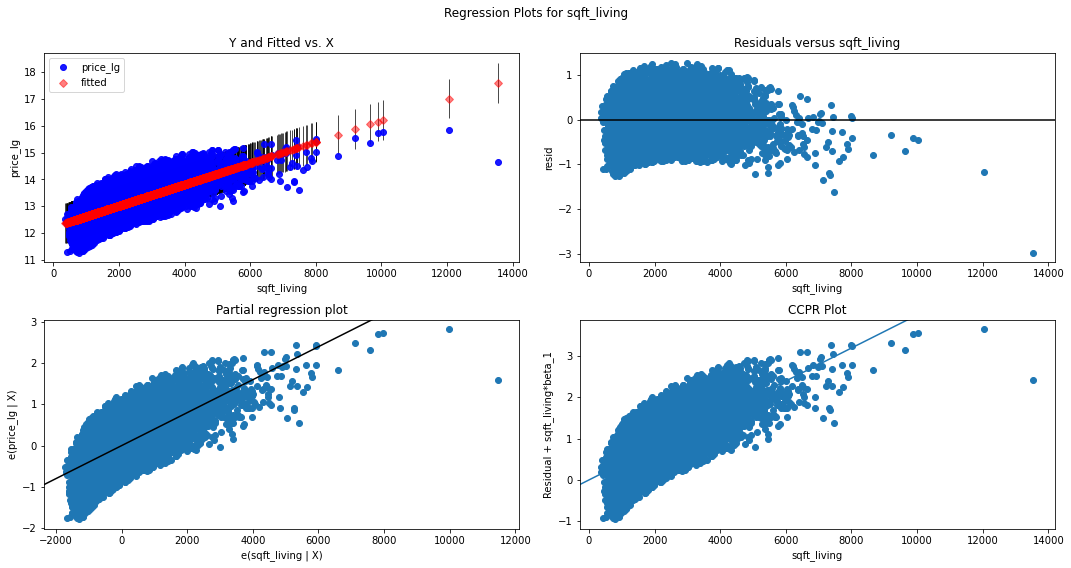

In [47]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(fsm, "sqft_living", fig=fig)
plt.show()

<ipython-input-48-f100f074761f>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


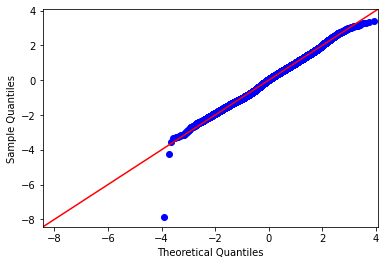

In [48]:
residuals = fsm.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

The First Simple Model betweent the highly correlating sqft_living feature with price has a low r-squared and a very high condition number indicating that there are possible numerical data issues. 

## Fixing the possible numeric data issues

In [49]:
X = kc1[['sqftlv_lg']]
y = kc1['price_lg']

In [50]:
predictors_int = sm.add_constant(X)
model = sm.OLS(y, predictors_int).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               price_lg   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.806e+04
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:19:48   Log-Likelihood:                -10230.
No. Observations:               21596   AIC:                         2.046e+04
Df Residuals:                   21594   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7232      0.047    142.609      0.0

## Square Footage of the home Statistical Analysis

The numerical issues were eliminated by log transforming the price and sqftlv values but the model then showed that still low r squared value indicating that the square footage alone does not explain the property value of a home.

## Adding more significantly correlarated features to the model 

The square footage of interior housing living space for the nearest 15 neighbors (sqft_living15),  square footage of house (sqftabv) and the overall grade given to the housing unit, based on King County grading system (grade) seemed to have equally significant correlation with the sales price and will added to the model to evaluate its performance

In [51]:
X_1 = kc1[['sqftlv_lg', 'sqft15_lg','sqftabv_lg']]
y = kc1['price_lg']

In [52]:
cat = ['grade']
catkc1 = kc[cat].astype('category')
dummies = pd.get_dummies(catkc1, prefix=cat, drop_first=True)
kc_p = kc1.drop(cat, axis=1)
kc_p = pd.concat([kc_p, dummies], axis=1)
X_1 = kc_p[['sqftlv_lg', 'sqft15_lg','sqftabv_lg','grade_4','grade_5','grade_6','grade_7','grade_8','grade_9'
            ,'grade_10','grade_11','grade_12','grade_13']]

#--------------------------Bar Plots--------------------------------------#
#set subplot data
predictors_int = sm.add_constant(X_1)
model_1 = sm.OLS(y, predictors_int).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:               price_lg   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     2156.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:19:48   Log-Likelihood:                -7803.8
No. Observations:               21596   AIC:                         1.564e+04
Df Residuals:                   21582   BIC:                         1.575e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3863      0.356     26.385      0.0

## Statistical Analysis of the model with more significantly correlated features

Adding the three more features that were also significantly correlated to the sales price increased the r squared value of the model. However the following conclusions are made form this model:
- The overall grade given to a housing unit is not significantly correlated to the sales price of a house and thus this feature will be dropped from versions of our model.
- The model condition number was very large indicating strong multicollinearity issues. Next version of the model not include grade and thus this will evaluate status of the condition number.
- The model R-squared value is still low. More features will be added to this model to see if this makes it perform better.
- Both the square footage of interior housing living space for the nearest 15 neighbors and square footage of house are significantly affect the property value.

## Adding other features to the model 

The next version of this model drops the grade and adds all the other features to further evaluate its perfomance.

In [53]:
cat1 = ['waterfront', 'Age', 'view', 'renovated', 'basement', 'bedrooms', 'season']
catkc2 = kc1[cat1].astype('category')
dummies = pd.get_dummies(catkc2, prefix=cat1, drop_first=True)
kc_p1 = kc1.drop(cat1, axis=1)
kc_p1 = pd.concat([kc_p1, dummies], axis=1)
X_2 = kc_p1.iloc[:, 6:].drop(['price_lg'], axis=1)

#--------------------------Bar Plots--------------------------------------#
#set subplot data
predictors_int = sm.add_constant(X_2)
model_2 = sm.OLS(y, predictors_int).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:               price_lg   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     1172.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:19:50   Log-Likelihood:                -8035.1
No. Observations:               21596   AIC:                         1.612e+04
Df Residuals:                   21572   BIC:                         1.631e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

## Statistical Analysis of the model with all the other features

This version of the model with all the other features made the following indications:
- The model R squared value is still low indicating that there could be other factors that would accurately explain it's predicted sales price. 
    -The relationship between the number of bedrooms and houses located in zipcodes with the same average sales prices will be introduced to the next version of this model to further evaluate its perfoamnce.
- Season when the property transctions occur, do not seem to significtantly affect the property value. The feature will further be evaluated as well.
- The number of bathrooms does not show significancy to the property value. The relationship between the number of bathrooms in relation to the number of bedrooms will further be evaluated and added to the model.


## Relationship between the number of bedrooms and property location

### Normalizing Dsitribution

## Introduction of the relationship between bedrooms in different zipcodes with the same mean sales price

In [54]:
cat1 = ['waterfront', 'Age', 'view', 'renovated', 'basement', 'bedrooms', 'season', 'zipcode']
catkc2 = kc[cat1].astype('category')
dummies = pd.get_dummies(catkc2, prefix=cat1, drop_first=True)
kc_p1 = kc1.drop(cat1, axis=1)
kc_p1 = pd.concat([kc_p1, dummies], axis=1)
X_3 = kc_p1.iloc[:, 6:].drop(['price_lg'], axis=1)

#--------------------------Bar Plots--------------------------------------#
#set subplot data
predictors_int = sm.add_constant(X_3)
model_3 = sm.OLS(y, predictors_int).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:               price_lg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1543.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:19:53   Log-Likelihood:                 5010.1
No. Observations:               21596   AIC:                            -9836.
Df Residuals:                   21504   BIC:                            -9102.
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

In [55]:
d = X_3.columns.values.tolist()


In [56]:
d

['sqftlot_lg',
 'sqft15_lg',
 'sqftabv_lg',
 'sqftlv_lg',
 'waterfront_1.0',
 'Age_recent',
 'Age_vintage',
 'view_1.0',
 'view_2.0',
 'view_3.0',
 'view_4.0',
 'renovated_within_15yrs',
 'renovated_within_5yrs',
 'basement_1',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_980

In [57]:
model_3.bse.sort_values(ascending=False)

const                     0.047256
zipcode_98039             0.029211
zipcode_98148             0.027431
zipcode_98024             0.023991
zipcode_98010             0.021839
zipcode_98102             0.021686
zipcode_98109             0.021265
zipcode_98070             0.021035
zipcode_98014             0.020244
zipcode_98032             0.019991
waterfront_1.0            0.019793
zipcode_98188             0.019374
zipcode_98007             0.019186
bedrooms_6                0.018549
zipcode_98005             0.018095
zipcode_98119             0.017709
zipcode_98108             0.017493
zipcode_98077             0.017301
zipcode_98019             0.017295
zipcode_98011             0.017159
zipcode_98002             0.017036
zipcode_98045             0.016523
zipcode_98105             0.016518
zipcode_98022             0.016293
zipcode_98177             0.015875
renovated_within_5yrs     0.015861
zipcode_98166             0.015832
zipcode_98136             0.015823
zipcode_98112       

In [ ]:
s =model_3.bse
s_1 =s.to_frame()
s_1['bse'] =bse
s_1['params'] =params
s_1['t']=t
Zipcode = s_1[23:]
Zipcode.reset_index()
sortedz = Zipcode.sort_values('params', ascending=False,)[:5]

sortedz

In [59]:
kc_r = pd.read_csv("data/kc_house_data.csv")

In [60]:
kc_top5_price = kc_r.groupby("zipcode")["price"].mean().sort_values(ascending = False)

zip_cs = [98039, 98004, 98112, 98102, 98109]
#zip_mean_price = []
#for i in range(0, len(zip_cs)):
 #   kc
kc_top5_price[0:5]
#property values by zipcode calculation
zip_price = [2.161300e+06,1.356524e+06,1.096239e+06, 8.996077e+05,8.800778e+05 ]

zip_df = pd.DataFrame(kc_top5_price)


In [7]:
zip_df

,price
zipcode,
98039,2.161300e+06
98004,1.356524e+06
98040,1.194874e+06
98112,1.096239e+06
98102,8.996077e+05
98109,8.800778e+05
98105,8.632289e+05
98006,8.599386e+05
98119,8.497148e+05


In [8]:
#kc_top5_price = kc1['P_zip_bdrm'].sort_values(ascending = False)
kc_mean_price = kc_r['price'].mean()

In [9]:
kc_mean_price

540296.5735055795

<ipython-input-107-7fe34532ef14>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(area_labels, rotation=15, fontsize=13)
<ipython-input-107-7fe34532ef14>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.5', '1.0', '1.5', '2.0'], fontsize=13);


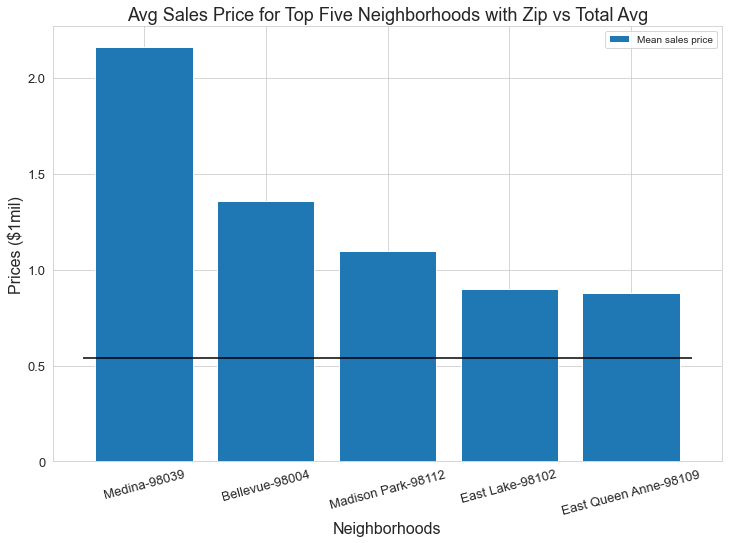

In [107]:
fig, ax = plt.subplots(figsize = (12, 8))
#plt.style.use=('dark_background')
#ax.spines['bottom'].set_color('gray')
#ax.spines['top'].set_color('gray')
#ax.spines['left'].set_color('gray')
#ax.spines['right'].set_color('gray')
#ax.yaxis.label.set_color('gray')
#ax.tick_params(axis='x', colors='gray')
#ax.yaxis.label.set_color('gray')
#ax.tick_params(axis='y', colors='gray')
#ax.xaxis.label.set_color('gray')
#top5 model neighborhood label for plot
area_labels = ["Medina-98039", "Bellevue-98004", "Madison Park-98112", 
               "East Lake-98102", "East Queen Anne-98109"]
#mean for the top 5 Model neighborhoods.
zip_price = [2.161300e+06,1.356524e+06,1.096239e+06, 8.996077e+05,8.800778e+05 ]

ax.bar(area_labels, zip_price)
ax.set_title('Avg Sales Price for Top Five Neighborhoods with Zip vs Total Avg', fontsize=18)
ax.set_xlabel('Neighborhoods', fontsize=16)
ax.set_ylabel('Prices ($1mil)', fontsize=16)
ax.legend(['Mean sales price', 'Average Price'])
plt.hlines(kc_mean_price, -.5 ,4.5, colors="black", label="Average Price")
ax.set_xticklabels(area_labels, rotation=15, fontsize=13)
ax.set_yticklabels(['0', '0.5', '1.0', '1.5', '2.0'], fontsize=13);
plt.savefig('./images/Mean_Sales_Zip_Price_ppt',bbox_inches='tight')

<ipython-input-106-0397fd017346>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(area_labels, rotation=15, fontsize=13, color='gray')
<ipython-input-106-0397fd017346>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '0.5', '1.0', '1.5', '2.0'], fontsize=13, color='gray');


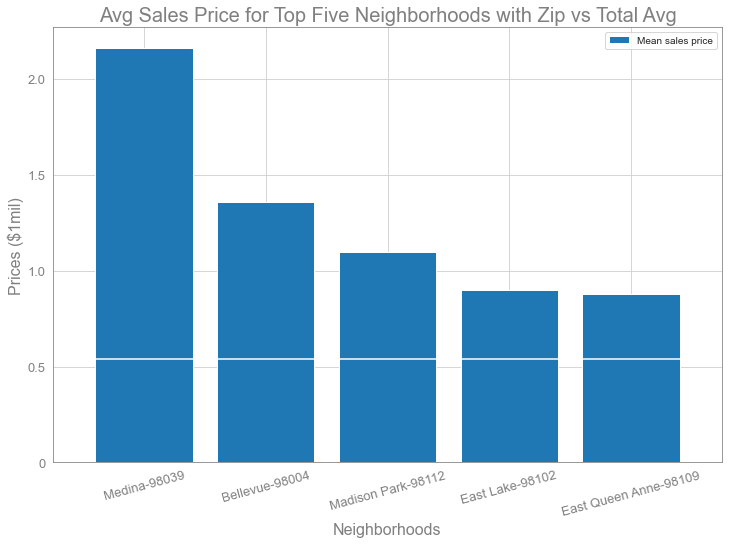

In [106]:
fig, ax = plt.subplots(figsize = (12, 8))
plt.style.use=('dark_background')
ax.spines['bottom'].set_color('gray')
ax.spines['top'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.yaxis.label.set_color('gray')
ax.tick_params(axis='x', colors='gray')
ax.yaxis.label.set_color('gray')
ax.tick_params(axis='y', colors='gray')
ax.xaxis.label.set_color('gray')
#top5 model neighborhood label for plot
area_labels = ["Medina-98039", "Bellevue-98004", "Madison Park-98112", 
               "East Lake-98102", "East Queen Anne-98109"]
#mean for the top 5 Model neighborhoods.
zip_price = [2.161300e+06,1.356524e+06,1.096239e+06, 8.996077e+05,8.800778e+05 ]

ax.bar(area_labels, zip_price)
ax.set_title('Avg Sales Price for Top Five Neighborhoods with Zip vs Total Avg', fontsize=20, color='gray')
ax.set_xlabel('Neighborhoods', fontsize=16, color='gray')
ax.set_ylabel('Prices ($1mil)', fontsize=16, color='gray')
ax.legend(['Mean sales price', 'Average Price'])
plt.hlines(kc_mean_price, -.5 ,4.5, colors="white", label="Average Price")
ax.set_xticklabels(area_labels, rotation=15, fontsize=13, color='gray')
ax.set_yticklabels(['0', '0.5', '1.0', '1.5', '2.0'], fontsize=13, color='gray');
plt.savefig('./images/Mean_Sales_Zip_Price',bbox_inches='tight', transparent=True)

In [19]:
! ls


COPY_PLAY_NOTEBOOK.ipynb
Final_Technical_notebook.ipynb
README.md
Untitled.ipynb
WaterFrontView.png
data
ev working notebook.ipynb
images
student.ipynb


asdfasdfafd

C:\Users\Erin Vu\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals Distribution Plot')

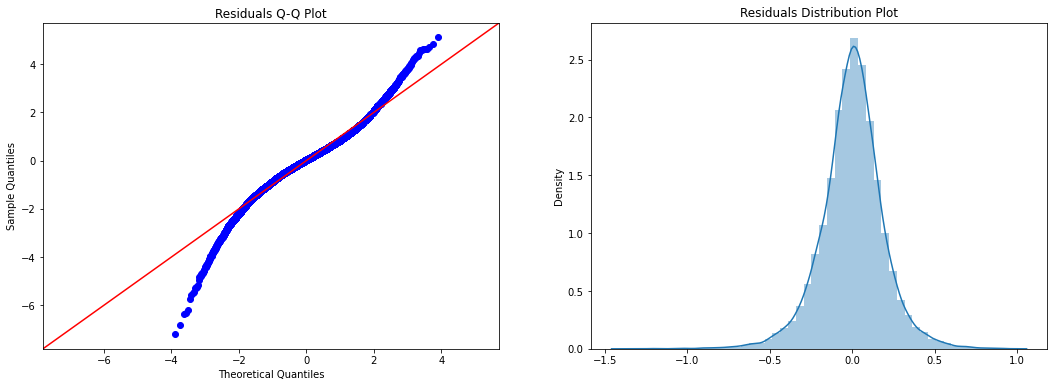

In [62]:
fig, axs = plt.subplots(ncols=2, figsize = (18,6))

residuals = model_3.resid
sm.graphics.qqplot(residuals, dist = stats.norm, line='45', fit=True, ax=axs[0])
axs[0].set_title('Residuals Q-Q Plot')
sns.distplot(residuals, ax=axs[1])
axs[1].set_title('Residuals Distribution Plot')

Text(0.5, 1.0, 'Residuals Scatterplot')

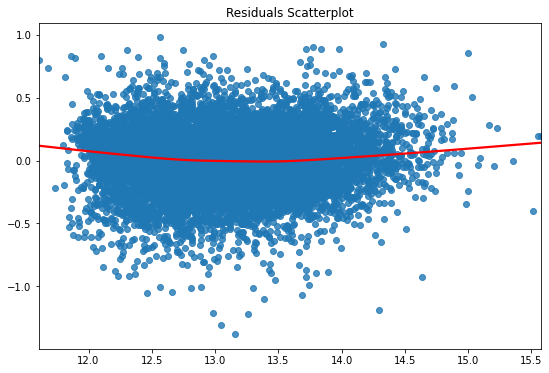

In [63]:
plt.figure(figsize=(9,6))
sns.regplot(x=model_3.predict(), y=model_3.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot')

In [103]:
x_bar = {'sqftlv_lg': 0.3624,
 'sqftabv_lg': 0.2555,
 'waterfront': 0.3935,
 'renovated_15': 0.1264,
 'renovated_5': 0.1484,
 'view_1': 0.1490,
 'view_2': 0.1709,
 'view_3': 0.2626,
 'view_4': 0.4233}

<ipython-input-110-f9b7bd418c3f>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_bar.keys(), rotation=15, fontsize=13)


[Text(0, 0, 'sqftlv_lg'),
 Text(1, 0, 'sqftabv_lg'),
 Text(2, 0, 'waterfront'),
 Text(3, 0, 'renovated_15'),
 Text(4, 0, 'renovated_5'),
 Text(5, 0, 'view_1'),
 Text(6, 0, 'view_2'),
 Text(7, 0, 'view_3'),
 Text(8, 0, 'view_4')]

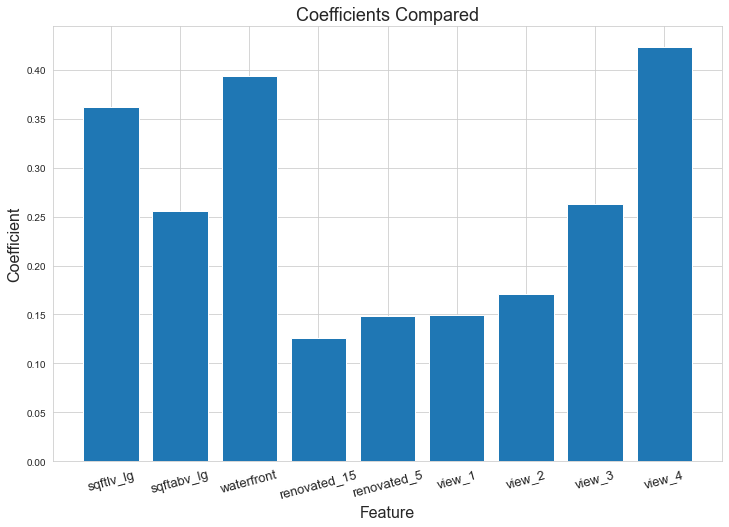

In [110]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(x_bar.keys(), x_bar.values())
ax.set_title('Coefficients Compared', fontsize=18)
ax.set_xlabel('Feature', fontsize=16)
ax.set_ylabel('Coefficient', fontsize=16)
ax.set_xticklabels(x_bar.keys(), rotation=15, fontsize=13)
#ax.set_yticklabels(['0', '0.5', '1.0', '1.5', '2.0'], fontsize=13);
#plt.savefig('./images/Mean_Sales_Zip_Price_ppt',bbox_inches='tight')

## Statistical Analysis of the model with the number of bedrooms in property located within zipcodes that have almost the same mean sales prices

The introduction of the interaction between the property number of bedrooms and the zipcodes with almost similar property mean sales prices gives the model an r squared value of 0.82 meaning that the model has a significant potion of features to be used for sales price predictions.

The following features' impact to the property values stand as per this model:
- Properties located in zipcodes where the mean sales price are higher within Kings County are more likely to have significnatly higher propery values as their number of bedrooms increase. 
- Properties with waterfronts are more likely to have higher value than those without.
- The size of both square footage of interior housing living space for the nearest 15 neighbors and square footage of property positively affect the property value. 
- The number of times house has been viewed posivitely increases it's property value.
- Revonating properties every 5 years or 15 years almost affects the property value in the same way.

In [66]:
kc_p1 

,sqft_living,floors,condition,grade,sqft_living15,bathrooms_lg,sqftlot_lg,sqft15_lg,sqftabv_lg,sqftlv_lg,price_lg,waterfront_1.0,Age_recent,Age_vintage,view_1.0,view_2.0,view_3.0,view_4.0,renovated_within_15yrs,renovated_within_5yrs,basement_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,season_Spring,season_Summer,season_Winter,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1180,1.0,3,7,1340,0.000000,8.639411,7.200425,7.073270,7.073270,12.309982,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2570,2.0,3,7,1690,0.810930,8.941022,7.432484,7.682482,7.851661,13.195614,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,770,1.0,3,6,2720,0.000000,8.994917,7.908387,6.646391,6.646391,12.100712,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1960,1.0,5,7,1360,1.098612,8.517193,7.215240,6.956545,7.580700,13.311329,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1680,1.0,3,8,1800,0.693147,8.923058,7.495542,7.426549,7.426549,13.142166,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,3.0,3,8,1530,0.916291,7.319202,7.333023,7.333023,7.333023,12.793859,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21593,2310,2.0,3,8,1830,0.916291,8.881836,7.512071,7.745003,7.745003,12.899220,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21594,1020,2.0,3,7,1020,-0.287682,7.604396,6.927558,6.927558,6.927558,12.904459,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21595,1600,2.0,3,8,1410,0.916291,7.160069,7.251345,7.377759,7.377759,12.899220,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
# Box plot comparison of house prices with no waterfront view vs house prices with waterfront view.
sns.set_style("whitegrid") 
ax = sns.catplot(x="view", y="price", kind="box", data=kc)
plt.title('Number of Views VS Housing Prices')
plt.savefig('WaterFrontView.png',dpi=300, bbox_inches = "tight")

ValueError: Could not interpret input 'price'

In [68]:
kc1['P_zip_bdrm'].sort_values(ascending = False)[:5]

KeyError: 'P_zip_bdrm'

In [69]:
#property values by zipcode calculation
#kc_top5_price = kc1['P_zip_bdrm'].sort_values(ascending = False)
kc_mean_price = kc['price'].mean()
#top5 neighborhood label for plot
area_labels = ["First", "Second", "Third", "Fourth", "Fifth"]
  

KeyError: 'price'

In [ ]:


#plotting the data
plt.subplots(figsize=(8,4))
sns.barplot(x=kc_top5_price.index, y=kc_top5_price, order=kc_top5_price.index, palette="Blues_d") #blue for seahawks!
plt.xticks(np.arange(5), area_labels, rotation=75, size=8) #relabel x with list above
plt.hlines(kc_mean_price, -.5 ,4.5, colors="darkgoldenrod", label="Average Price") #plot average price horizontal line

#prettify graph
plt.xlabel("Neighborhoods", size=14)
plt.ylabel("Prices ($1mil)", size=14)
plt.title("Neighborhoods with Highest Property Price", size=16, y=1.08)
plt.legend() #show legend

#uncomment line below to export image
# plt.savefig("images/high_price_neighborhood.png",bbox_inches = "tight")
plt.show();

In [70]:
import geopandas

ModuleNotFoundError: No module named 'geopandas'

In [71]:
#shapefile data setup
king_county = gpd.read_file("data/zipcode_shape/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.shp")
king_county["zipcode"] = king_county["ZIP"] #set up column for merge

#kc_df price setup
zip_price = kc_df.groupby("zipcode").price.mean()

#plotting data setup
zip_plot_df = king_county.join(zip_price, on="zipcode", how="inner")

NameError: name 'gpd' is not defined

NameError: name 'zip_plot_df' is not defined

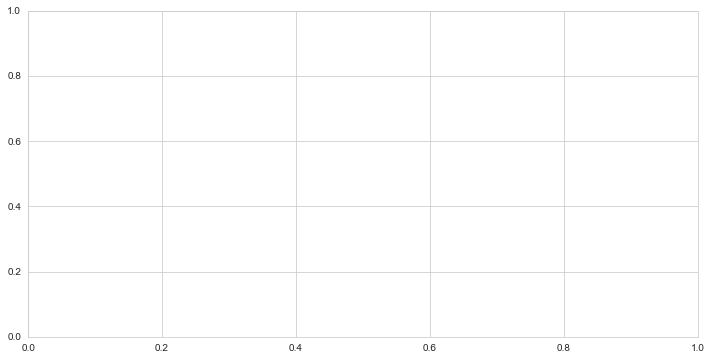

In [72]:
#plot setup
fig, ax = plt.subplots(figsize=(12,6))
zip_plot_df.plot(column="price", cmap="YlOrRd", linewidth=.25, edgecolor=".25", ax=ax)

#set up colorbar
color_bar = plt.cm.ScalarMappable(cmap="YlOrRd", norm=plt.Normalize(vmin=zip_price.min(), vmax=zip_price.max()))
color_bar._A = []
cbar = fig.colorbar(color_bar, fraction=0.03, pad=0.02)

#set figure limit to zoom in on select neighborhoods
ax.set_ylim(47.45, 47.7)
ax.set_xlim(-122.35, -122.15)
ax.set_xticks([-122.35, -122.15])
ax.set_ylabel("Latitude", size=12)
ax.set_xlabel("Longitude", size=12)

#labeling few areas
ax.text(-122.257, 47.62, 'Medina')
ax.text(-122.2, 47.57, 'Bellevue', rotation=-45)
ax.text(-122.26, 47.58, 'Mercer Island')

plt.title("Average Price per Zipcode Heatmap", size=14)
#uncomment below to save image
# plt.savefig("images/zipcode_price_heatmap.png",bbox_inches = "tight")
plt.show();

In [ ]:
## Model with addition features

In [13]:
cat_1 = ['waterfront']

In [14]:
cat1_kc1 = kc[cat_1].astype('category')

NameError: name 'kc' is not defined

In [ ]:
cat1_kc1 = kc1[cat_1].astype('category')
dummies = pd.get_dummies(cat1_kc1, prefix=cat_1, drop_first=True)

kc_p1 = kc1.drop(cat_1, axis=1)

kc_p1 = pd.concat([kc_p1, dummies], axis=1)

In [ ]:
X1 = kc_p1[['waterfront_1.0','sqftlv15_lg']]
y = kc_p1['price_lg']

In [ ]:
predictors_int = sm.add_constant(X1)
model1 = sm.OLS(y, predictors_int).fit()
print(model1.summary())

In [ ]:
cat_2 = ['waterfront', 'Age']

In [ ]:
cat2_kc1 = kc[cat_2].astype('category')

In [ ]:
cat_2 = ['waterfront', 'Age']
cat2_kc1 = kc[cat_2].astype('category')
dummies = pd.get_dummies(cat2_kc1, prefix=cat_2, drop_first=True)

kc_p2 = kc1.drop(cat_2, axis=1)

kc_p2 = pd.concat([kc_p2, dummies], axis=1)

In [ ]:
X2 = kc_p2[['waterfront_1.0','sqftlv15_lg','Age_recent','Age_vintage']]

In [ ]:
predictors_int = sm.add_constant(X2)
model2 = sm.OLS(y, predictors_int).fit()
print(model2.summary())

Age does not seem to be significant to our model at this point though we keep it for now. Vintage seems to have more data points compared to recent and new.

In [ ]:
#-------------------Conditions Calculation--------------------------------#
cat_3 = ['waterfront', 'Age', 'view']
cat3_kc1 = kc[cat_3].astype('category')
dummies = pd.get_dummies(cat3_kc1, prefix=cat_3, drop_first=True)
kc_p3 = kc1.drop(cat_3, axis=1)
kc_p3 = pd.concat([kc_p3, dummies], axis=1)
X3 = kc_p3[['waterfront_1.0','sqftlv15_lg','Age_recent','Age_vintage','view_1.0', 'view_2.0','view_3.0', 'view_4.0']]

#--------------------------Bar Plots--------------------------------------#
#set subplot data
predictors_int = sm.add_constant(X3)
model3 = sm.OLS(y, predictors_int).fit()
print(model3.summary())

In [ ]:
kc_p4

In [ ]:
X3

In [ ]:
#-------------------Conditions Calculation--------------------------------#
cat_4 = ['waterfront', 'Age', 'view', 'renovated']
cat4_kc1 = kc[cat_4].astype('category')
dummies = pd.get_dummies(cat4_kc1, prefix=cat_4, drop_first=True)
kc_p4 = kc1.drop(cat_4, axis=1)
kc_p4 = pd.concat([kc_p4, dummies], axis=1)
X4 = kc_p4[['waterfront_1.0','sqftlv15_lg','Age_recent','Age_vintage','view_1.0', 'view_2.0',
            'view_3.0', 'view_4.0', 'renovated_within_15yrs', 'renovated_within_5yrs']]

#--------------------------Bar Plots--------------------------------------#
#set subplot data
predictors_int = sm.add_constant(X4)
model4 = sm.OLS(y, predictors_int).fit()
print(model4.summary())

In [ ]:
#-------------------Conditions Calculation--------------------------------#
cat_5 = ['waterfront', 'Age', 'view', 'renovated', 'season']
cat5_kc1 = kc[cat_5].astype('category')
dummies = pd.get_dummies(cat5_kc1, prefix=cat_5, drop_first=True)
kc_p5 = kc1.drop(cat_5, axis=1)
kc_p5 = pd.concat([kc_p5, dummies], axis=1)
X5 = kc_p5[['waterfront_1.0','sqftlv15_lg','Age_recent','Age_vintage','view_1.0', 'view_2.0',
            'view_3.0', 'view_4.0', 'renovated_within_15yrs', 'renovated_within_5yrs','season_Spring',
           'season_Summer','season_Winter']]

#--------------------------Bar Plots--------------------------------------#
#set subplot data
predictors_int = sm.add_constant(X5)
model5 = sm.OLS(y, predictors_int).fit()
print(model5.summary())

In [ ]:
#-------------------Conditions Calculation--------------------------------#
cat_6 = ['waterfront', 'Age', 'view', 'renovated', 'season', 'basement']
cat6_kc1 = kc[cat_6].astype('category')
dummies = pd.get_dummies(cat6_kc1, prefix=cat_6, drop_first=True)
kc_p6 = kc1.drop(cat_6, axis=1)
kc_p6 = pd.concat([kc_p6, dummies], axis=1)
X6 = kc_p6[['waterfront_1.0','sqftlv15_lg','Age_recent','Age_vintage','view_1.0', 'view_2.0',
            'view_3.0', 'view_4.0', 'renovated_within_15yrs', 'renovated_within_5yrs','season_Spring',
           'season_Summer','season_Winter','basement_1']]

#--------------------------Bar Plots--------------------------------------#
#set subplot data
predictors_int = sm.add_constant(X6)
model6 = sm.OLS(y, predictors_int).fit()
print(model6.summary())

In [ ]:
#-------------------Conditions Calculation--------------------------------#
cat_7 = ['waterfront', 'Age', 'view', 'renovated', 'season', 'basement', 'bedrooms']
cat7_kc1 = kc[cat_7].astype('category')
dummies = pd.get_dummies(cat7_kc1, prefix=cat_7, drop_first=True)
kc_p7 = kc1.drop(cat_7, axis=1)
kc_p7 = pd.concat([kc_p7, dummies], axis=1)
X7 = kc_p7.iloc[:, 6:].drop(['price_lg'], axis=1)

#--------------------------Bar Plots--------------------------------------#
#set subplot data
predictors_int = sm.add_constant(X7)
model7 = sm.OLS(y, predictors_int).fit()
print(model7.summary())

In [ ]:
#-------------------Conditions Calculation--------------------------------#
cat_8 = ['waterfront', 'Age', 'view', 'renovated', 'season', 'basement', 'bedrooms', 'grade', 'condition']
cat8_kc1 = kc[cat_8].astype('category')
dummies = pd.get_dummies(cat8_kc1, prefix=cat_8, drop_first=True)
kc_p8 = kc1.drop(cat_8, axis=1)
kc_p8 = pd.concat([kc_p8, dummies], axis=1)
X8 = kc_p8.iloc[:, 6:].drop(['price_lg'], axis=1)

#--------------------------Bar Plots--------------------------------------#
#set subplot data
predictors_int = sm.add_constant(X8)
model8 = sm.OLS(y, predictors_int).fit()
print(model8.summary())

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize = (18,6))

residuals = model10.resid
sm.graphics.qqplot(residuals, dist = stats.norm, line='45', fit=True, ax=axs[0])
axs[0].set_title('Residuals Q-Q Plot')
sns.distplot(residuals, ax=axs[1])
axs[1].set_title('Residuals Distribution Plot')

In [ ]:
kc1['P_zip_bdrm'] = kc['bedrooms']*kc['price_zipcode']
plt.hist(kc1['P_zip_bdrm'], bins=10)
plt.show()

In [ ]:
kc1['P_zip_bdrm_lg'] =np.log(kc1['P_zip_bdrm'])
plt.hist(kc1['P_zip_bdrm_lg'], bins=10)
plt.show()

In [ ]:
kc_p9['P_zip_bdrm_lg'] = np.log(kc1['P_zip_bdrm'])

In [ ]:
#-------------------Conditions Calculation--------------------------------#
cat_9 = ['waterfront', 'Age', 'view', 'renovated', 'season', 'basement', 'bedrooms', 'grade', 'condition']
cat9_kc1 = kc[cat_9].astype('category')
dummies = pd.get_dummies(cat9_kc1, prefix=cat_9, drop_first=True)
kc_p9 = kc1.drop(cat_9, axis=1)
kc_p9 = pd.concat([kc_p9, dummies], axis=1)
X9 = kc_p9.iloc[:, 6:].drop(['price_lg'], axis=1)

#--------------------------Bar Plots--------------------------------------#
#set subplot data
predictors_int = sm.add_constant(X9)
model9 = sm.OLS(y, predictors_int).fit()
print(model9.summary())

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize = (18,6))

residuals = model9.resid
sm.graphics.qqplot(residuals, dist = stats.norm, line='45', fit=True, ax=axs[0])
axs[0].set_title('Residuals Q-Q Plot')
sns.distplot(residuals, ax=axs[1])
axs[1].set_title('Residuals Distribution Plot')

In [ ]:
plt.figure(figsize=(9,6))
sns.regplot(x=model9.predict(), y=model9.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot')

In [ ]:
#-------------------Conditions Calculation--------------------------------#
cat_10 = ['waterfront', 'Age', 'view', 'renovated', 'basement', 'bedrooms', 'season']
cat10_kc1 = kc[cat_10].astype('category')
dummies = pd.get_dummies(cat10_kc1, prefix=cat_10, drop_first=True)
kc_p10 = kc1.drop(cat_10, axis=1)
kc_p10 = pd.concat([kc_p10, dummies], axis=1)
X10 = kc_p10.iloc[:, 6:].drop(['price_lg','P_zip_bdrm'], axis=1)

#--------------------------Bar Plots--------------------------------------#
#set subplot data
predictors_int = sm.add_constant(X10)
model10 = sm.OLS(y, predictors_int).fit()
print(model10.summary())

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize = (18,6))

residuals = model10.resid
sm.graphics.qqplot(residuals, dist = stats.norm, line='45', fit=True, ax=axs[0])
axs[0].set_title('Residuals Q-Q Plot')
sns.distplot(residuals, ax=axs[1])
axs[1].set_title('Residuals Distribution Plot')

In [ ]:
plt.figure(figsize=(9,6))
sns.regplot(x=model10.predict(), y=model10.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot')

In [ ]:
#-------------------Conditions Calculation--------------------------------#
cat_7 = ['waterfront', 'Age', 'view', 'renovated', 'season', 'basement', 'bedrooms']
cat7_kc1 = kc[cat_7].astype('category')
dummies = pd.get_dummies(cat7_kc1, prefix=cat_7, drop_first=True)
kc_p7 = kc1.drop(cat_7, axis=1)
kc_p7 = pd.concat([kc_p7, dummies], axis=1)
X7 = kc_p7.drop([kc.columns])

#--------------------------Bar Plots--------------------------------------#
#set subplot data
predictors_int = sm.add_constant(X7)
model7 = sm.OLS(y, predictors_int).fit()
print(model7.summary())

In [ ]:
kc1['P_zip_bdrm'] = kc['bedrooms']*kc['price_zipcode']
plt.hist(kc1['P_zip_bdrm'], bins=10)
plt.show()

In [ ]:
kc1['P_zip_bdrm_lg'] =np.log(kc1['P_zip_bdrm'])
plt.hist(kc1['P_zip_bdrm_lg'], bins=10)
plt.show()

In [ ]:
#-------------------Conditions Calculation--------------------------------#
condition_mean = kc_df.groupby("condition")["price"].mean()
condition_median = kc_df.groupby("condition")["price"].median()
condition_score = np.arange(1,6)

#--------------------------Bar Plots--------------------------------------#
#set subplot data
fig, ax = plt.subplots(figsize=(8,4))
ax2 = ax.twinx() #set ax2 on same x axis as ax
ax3 = ax.twinx() #same as above, for hline
width = 0.5

#barplots 
ax.bar(x=condition_score, height=condition_median, width=width,
       label="Median Price", color="midnightblue", alpha=0.8)
ax2.bar(x=condition_score, height=condition_mean, width=width,
        label="Mean Price", color="royalblue", alpha=0.8)

#horizontal line for mean price
ax3.hlines(kc_mean_price, .7 ,5.3, colors="red", label="Average Price")

#set ylimit to the same scale and display only 1
ax.set_ylim(0,1.2*condition_mean.max())
ax2.set_ylim(0,1.2*condition_mean.max())
ax3.set_ylim(0,1.2*condition_mean.max())
ax2.yaxis.set_visible(False) #hide the 2nd axis
ax3.yaxis.set_visible(False)

#set legend positions
ax.legend(bbox_to_anchor=(0,0,1,1), loc="upper left")
ax2.legend(bbox_to_anchor=(0,-.1,1,1), loc="upper left")
ax3.legend(bbox_to_anchor=(0,0,1,1), loc="upper right")

#prettify graph
ax.set_ylabel("Average Prices ($)", size=14)
ax.set_xlabel("Condition Score", size=14)
plt.title("Average Property Value per Condition", size=16, y=1.08)

#uncomment line below to export image
# plt.savefig("images/condition_value.png",bbox_inches = "tight")
plt.legend()
plt.show();

In [ ]:
kc1['Price_n_Age'] = kc['Price']*kc['price_zipcode']
plt.hist(kc1['P_zip_bdrm'], bins=10)
plt.show()

In [ ]:
#Dropping condition and grade since most their categories p-values are high.
X2 = kc_p1.drop(['price_lg','sqftlot_lg'], axis=1)

In [ ]:
predictors_int = sm.add_constant(X2)
model2 = sm.OLS(y, predictors_int).fit()
print(model2.summary())


Features Interactions

In [ ]:
kc1['P_zip_bdrm'] = kc['bedrooms']*kc['price_zipcode']
plt.hist(kc1['P_zip_bdrm'], bins=10)
plt.show()

In [ ]:
kc1['P_zip_bdrm_lg'] =np.log(kc1['P_zip_bdrm'])
plt.hist(kc1['P_zip_bdrm_lg'], bins=10)
plt.show()

In [ ]:
cat1_kc1 = kc1[cat1].astype('category')

In [ ]:
cat1_kc1 = kc1[cat1].astype('category')
dummies = pd.get_dummies(cat1_kc1, prefix=cat1, drop_first=True)

kc_p1 = kc1.drop(cat1, axis=1)

kc_p1 = pd.concat([kc_p1, dummies], axis=1)

In [ ]:
X3 = kc_p1.drop(['P_zip_bdrm', 'price_lg','sqftlot_lg'], axis=1)

In [ ]:
predictors_int = sm.add_constant(X3)
model3 = sm.OLS(y, predictors_int).fit()
print(model3.summary())

In [ ]:
# Dropping the p_zipcode_Q since it is not significant to the model
X4 = kc_p1.drop(['P_zip_bdrm', 'price_lg','sqftlot_lg','p_zipcode_Q_2','p_zipcode_Q_3', 'p_zipcode_Q_4', 'p_zipcode_Q_5' ], axis=1)

In [ ]:
predictors_int = sm.add_constant(X4)
model4 = sm.OLS(y, predictors_int).fit()
print(model4.summary())

In [ ]:
# Dropping floors since they have a high pvalue
# Dropping the p_zipcode_Q since it is not significant to the model
X5 = kc_p1.drop(['P_zip_bdrm', 'sqft_living15','price_lg','sqftlot_lg','p_zipcode_Q_2','p_zipcode_Q_3', 'p_zipcode_Q_4', 'p_zipcode_Q_5' ], axis=1)

In [ ]:
predictors_int = sm.add_constant(X5)
model5 = sm.OLS(y, predictors_int).fit()
print(model5.summary())

In [ ]:
X6 = kc_p1.drop(['P_zip_bdrm', 'sqft_living15','price_lg','floors',
                 'sqftlot_lg','p_zipcode_Q_2','p_zipcode_Q_3', 'p_zipcode_Q_4', 'p_zipcode_Q_5' ], axis=1)

In [ ]:
predictors_int = sm.add_constant(X6)
model6 = sm.OLS(y, predictors_int).fit()
print(model6.summary())

In [ ]:
X7 = kc_p1.drop(['P_zip_bdrm', 'sqft_living15','price_lg','floors','sqftlot_lg','sqftlv15_lg','p_zipcode_Q_2','p_zipcode_Q_3', 'p_zipcode_Q_4', 'p_zipcode_Q_5' ], axis=1)

In [ ]:
predictors_int = sm.add_constant(X7)
model7 = sm.OLS(y, predictors_int).fit()
print(model7.summary())

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize = (18,6))

residuals = model7.resid
sm.graphics.qqplot(residuals, dist = stats.norm, line='45', fit=True, ax=axs[0])
axs[0].set_title('Residuals Q-Q Plot')
sns.distplot(residuals, ax=axs[1])
axs[1].set_title('Residuals Distribution Plot')

In [ ]:
plt.figure(figsize=(9,6))
sns.regplot(x=model7.predict(), y=model7.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot')